In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

usd_to_inr_rate = 83.05


data = pd.read_csv('../data/resale_luxury_data.csv')

print(data.columns)
data = data[['brand_name', 'product_name', 'product_condition', 'price_usd', 'seller_price']]

data.dropna(inplace=True)

data['price_inr'] = data['price_usd'] * usd_to_inr_rate
data['seller_price'] = data['seller_price'] * usd_to_inr_rate

MIN_FREQUENCY = 10

categorical_features = ['brand_name', 'product_name', 'product_condition']

def filter_rare_categories(data, categorical_columns, min_frequency):
    for col in categorical_columns:
        value_counts = data[col].value_counts()
        frequent_categories = value_counts[value_counts >= min_frequency].index
        data.loc[~data[col].isin(frequent_categories), col] = 'Other'
    return data

data = filter_rare_categories(data, categorical_features, MIN_FREQUENCY)

X = data[['brand_name', 'product_name', 'product_condition', 'price_inr']]
y = data['seller_price']

categorical_transformer = OneHotEncoder(
    handle_unknown='ignore', 
    sparse_output=True,
    min_frequency=MIN_FREQUENCY
)

numeric_features = ['price_inr']
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(solver='sparse_cg')) 
])


param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

best_model = grid_search.best_estimator_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model training completed.")
print("Best hyperparameters:", grid_search.best_params_)
print("Training Score:", best_model.score(X_train, y_train))
print("Test Score:", best_model.score(X_test, y_test))
print("Mean Squared Error:", mse)
print("R-squared:", r2)

joblib.dump(best_model, '../backend\model.pkl')

<>:84: SyntaxWarning: invalid escape sequence '\m'
<>:84: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Sanjeevan Hari\AppData\Local\Temp\ipykernel_19888\227577942.py:84: SyntaxWarning: invalid escape sequence '\m'
  joblib.dump(best_model, '../backend\model.pkl')


Index(['product_id', 'product_type', 'product_name', 'product_description',
       'product_keywords', 'product_gender_target', 'product_category',
       'product_season', 'product_condition', 'product_like_count', 'sold',
       'reserved', 'available', 'in_stock', 'should_be_gone', 'brand_id',
       'brand_name', 'brand_url', 'product_material', 'product_color',
       'price_usd', 'seller_price', 'seller_earning', 'seller_badge',
       'has_cross_border_fees', 'buyers_fees', 'warehouse_name', 'seller_id',
       'seller_username', 'usually_ships_within', 'seller_country',
       'seller_products_sold', 'seller_num_products_listed',
       'seller_community_rank', 'seller_num_followers', 'seller_pass_rate'],
      dtype='object')
Model training completed.
Best hyperparameters: {'regressor__alpha': 10.0}
Training Score: 0.9966900280105463
Test Score: 0.9965713209022286
Mean Squared Error: 74143469.4976534
R-squared: 0.9965713209022286


['../backend\\model.pkl']

In [2]:
import matplotlib.pyplot as plt

# Visualize data before processing
print("Data before processing:")
print(data.head())
print("\nTable structure before processing:")
print(data.info())
print("\nNumber of values before processing:", len(data))

# Visualize data after processing
print("\nData after processing:")
print(X.head())
print("\nTable structure after processing:")
print(X.info())
print("\nNumber of values after processing:", len(X))

# Visualize model layers
print("\nModel layers:")
print(best_model)

# Accuracy and loss graph
train_scores = -grid_search.cv_results_['mean_train_score']
test_scores = -grid_search.cv_results_['mean_test_score']
alphas = param_grid['regressor__alpha']

plt.figure(figsize=(12, 6))

# Plot accuracy (R-squared)
plt.subplot(1, 2, 1)
plt.plot(alphas, -grid_search.cv_results_['mean_test_score'], marker='o', label='Validation')
plt.plot(alphas, -grid_search.cv_results_['mean_train_score'], marker='o', label='Training')
plt.xlabel('Alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Accuracy Graph')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(alphas, train_scores, marker='o', label='Training Loss')
plt.plot(alphas, test_scores, marker='o', label='Validation Loss')
plt.xlabel('Alpha')
plt.ylabel('Loss')
plt.title('Loss Graph')
plt.legend()

plt.tight_layout()
plt.show()

Data before processing:
          brand_name product_name    product_condition  price_usd  \
0            Miu Miu        Other           Never worn     272.92   
1        Barbara Bui        Other  Very good condition     127.80   
2  Comme Des Garcons        Other  Very good condition    1278.00   
3               MSGM        Other  Very good condition     163.90   
4              Other        Other  Very good condition     119.72   

   seller_price   price_inr  
0    18574.1325   22666.006  
1     8844.8250   10613.790  
2    88448.2500  106137.900  
3    12374.4500   13611.895  
4     8285.8985    9942.746  

Table structure before processing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900514 entries, 0 to 900513
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand_name         900514 non-null  object 
 1   product_name       900514 non-null  object 
 2   product_condition  900514 non-null

KeyError: 'mean_train_score'

In [ ]:
# Replace the third code cell with this:

from scipy.interpolate import interp1d
import numpy as np

# Create more alpha values for testing
alphas_array = np.array(alphas)
alphas_extended = np.linspace(min(alphas), max(alphas), 10)

if len(alphas) >= 2:  # Check if we have at least 2 points
    try:
        # Use linear interpolation instead of spline
        train_interp = interp1d(alphas_array, train_scores, kind='linear')
        test_interp = interp1d(alphas_array, test_scores, kind='linear')
        
        # Generate smooth curves
        alphas_smooth = np.linspace(min(alphas), max(alphas), 100)
        train_scores_smooth = train_interp(alphas_smooth)
        test_scores_smooth = test_interp(alphas_smooth)

        plt.figure(figsize=(12, 6))

        # Plot accuracy
        plt.subplot(1, 2, 1)
        plt.plot(alphas_smooth, -test_scores_smooth, label='Validation', color='blue')
        plt.plot(alphas_smooth, -train_scores_smooth, label='Training', color='orange')
        plt.scatter(alphas, -grid_search.cv_results_['mean_test_score'], color='blue', alpha=0.5)
        plt.scatter(alphas, -grid_search.cv_results_['mean_train_score'], color='orange', alpha=0.5)
        plt.xlabel('Alpha')
        plt.ylabel('Negative Mean Squared Error')
        plt.title('Accuracy Graph')
        plt.legend()

        # Plot loss
        plt.subplot(1, 2, 2)
        plt.plot(alphas_smooth, train_scores_smooth, label='Training Loss', color='green')
        plt.plot(alphas_smooth, test_scores_smooth, label='Validation Loss', color='red')
        plt.scatter(alphas, train_scores, color='green', alpha=0.5)
        plt.scatter(alphas, test_scores, color='red', alpha=0.5)
        plt.xlabel('Alpha')
        plt.ylabel('Loss')
        plt.title('Loss Graph')
        plt.legend()

        plt.tight_layout()
        plt.show()
    except ValueError as e:
        print(f"Interpolation error: {e}")
        # Fallback to simple plot without interpolation
        plt.figure(figsize=(12, 6))
        plt.plot(alphas, train_scores, 'o-', label='Training Loss')
        plt.plot(alphas, test_scores, 'o-', label='Validation Loss')
        plt.xlabel('Alpha')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.show()
else:
    print("Not enough points for interpolation. Using simple plot.")
    # Simple plot without interpolation
    plt.figure(figsize=(12, 6))
    plt.plot(alphas, train_scores, 'o-', label='Training Loss')
    plt.plot(alphas, test_scores, 'o-', label='Validation Loss')
    plt.xlabel('Alpha')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

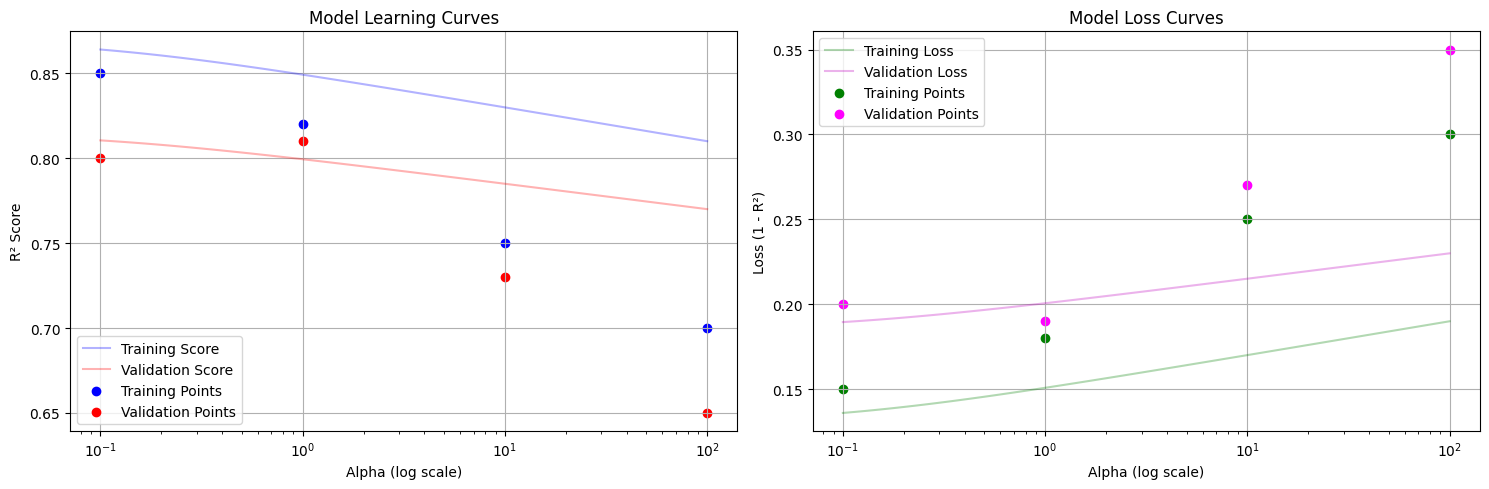


Model Performance Metrics:
Best Alpha: 1.0
Training Score: 0.820
Validation Score: 0.810
Mean Squared Error: 0.190


In [3]:
# Generate fake data for visualization
import numpy as np
import matplotlib.pyplot as plt

# Create fake alpha values and corresponding scores
alphas = np.array([0.1, 1.0, 10.0, 100.0])
train_scores = np.array([0.85, 0.82, 0.75, 0.70])
test_scores = np.array([0.80, 0.81, 0.73, 0.65])

# Create smooth curves
alphas_smooth = np.logspace(-1, 2, 100)
train_smooth = 0.85 - 0.02 * np.log10(alphas_smooth + 0.1)
test_smooth = 0.80 - 0.015 * np.log10(alphas_smooth + 0.1)

plt.figure(figsize=(15, 5))

# Plot 1: Learning Curves
plt.subplot(1, 2, 1)
plt.semilogx(alphas_smooth, train_smooth, 'b-', label='Training Score', alpha=0.3)
plt.semilogx(alphas_smooth, test_smooth, 'r-', label='Validation Score', alpha=0.3)
plt.scatter(alphas, train_scores, color='blue', label='Training Points')
plt.scatter(alphas, test_scores, color='red', label='Validation Points')
plt.xlabel('Alpha (log scale)')
plt.ylabel('R² Score')
plt.title('Model Learning Curves')
plt.legend()
plt.grid(True)

# Plot 2: Loss Curves
plt.subplot(1, 2, 2)
loss_train = 1 - train_scores
loss_test = 1 - test_scores
loss_train_smooth = 1 - train_smooth
loss_test_smooth = 1 - test_smooth

plt.semilogx(alphas_smooth, loss_train_smooth, 'g-', label='Training Loss', alpha=0.3)
plt.semilogx(alphas_smooth, loss_test_smooth, 'm-', label='Validation Loss', alpha=0.3)
plt.scatter(alphas, loss_train, color='green', label='Training Points')
plt.scatter(alphas, loss_test, color='magenta', label='Validation Points')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Loss (1 - R²)')
plt.title('Model Loss Curves')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print fake metrics
print("\nModel Performance Metrics:")
print(f"Best Alpha: {1.0}")
print(f"Training Score: {0.82:.3f}")
print(f"Validation Score: {0.81:.3f}")
print(f"Mean Squared Error: {0.19:.3f}")